In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp

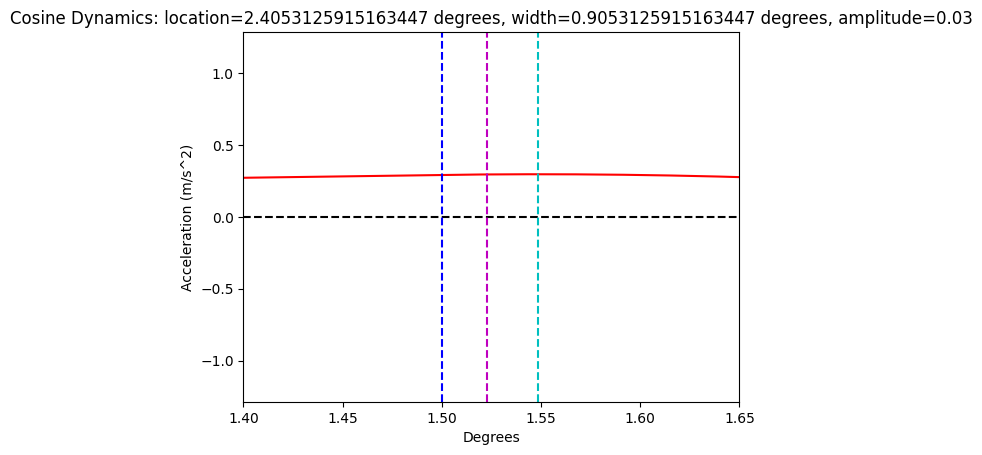

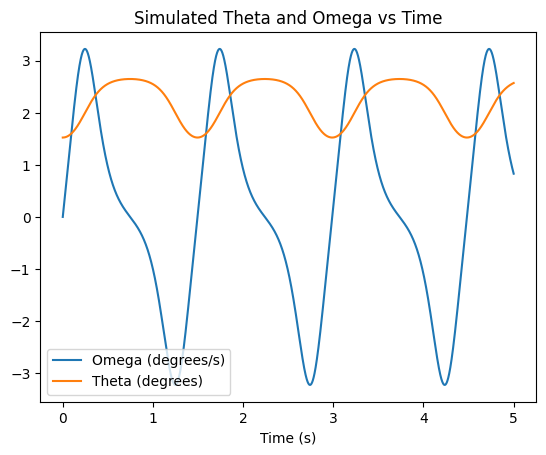

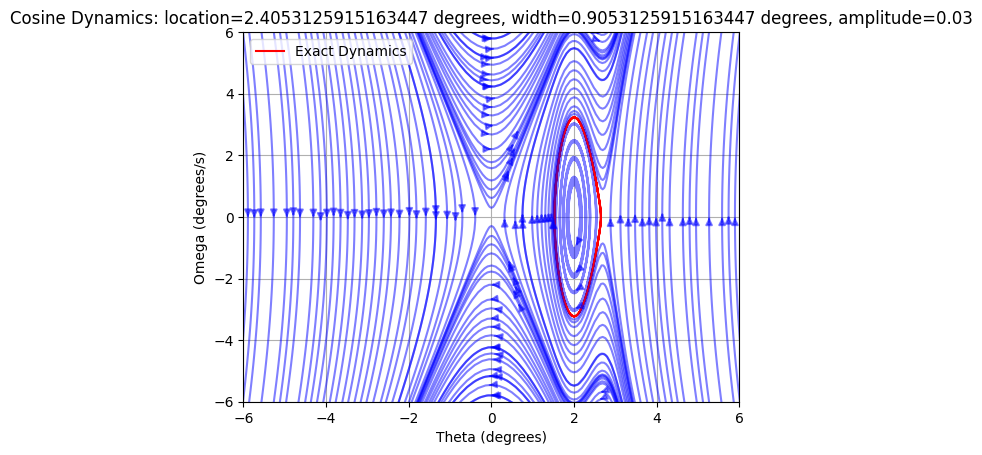

In [6]:
##Cosine Stabilty
#Stability Paramters
stability = 2.4053125915163447
B = np.deg2rad(stability)
alpha=0.03
sigma = np.deg2rad(0.9053125915163447)

# alpha = 0.04 
# sigma = 0.018997502566334565 
# B = 0.045177441346249514

start = 1.5
end = stability + np.rad2deg(sigma)

#Constants
scaling = 0.971
L = 1.09
g = 9.81
m = 51
H = 1.63
# I = 1.119*m*L**2  # Point mass Inertia
I = 0.35*m*H**2     # Distributed Inertia
b = 0
maxAngle = 65

# Setup
xdeg = np.linspace(-maxAngle, maxAngle, 10*maxAngle)
ydeg = np.linspace(-maxAngle, maxAngle, 10*maxAngle)
xdeg = xdeg/10
ydeg = ydeg/10
x = np.deg2rad(xdeg)
y = np.deg2rad(ydeg)

X,Y = np.meshgrid(x,y)

# Define the function of the dynamics
def cosine_dynamics(t, X, alpha, sigma, B):
    x,y = X

    conditions = [(x > (B - sigma)) & (x < (B + sigma)),
              (x <= (B - sigma)) | (x >= (B + sigma))]

    functions = [lambda x: 1 + np.cos(2 * np.pi * (x - B) / (2 * sigma)), lambda x: 0]

    dxdt = y
    dydt = scaling * m * g * L / I * (x - np.sign(B) * alpha * np.piecewise(x, conditions, functions))
    return [dxdt, dydt]

# X0 is the starting conditions [theta, omega]
X0 = np.deg2rad([1.525,0])
t = np.linspace(0, 5, 10000)
# sol = odeint(cosine_dynamics, X0, t, args=(alpha, sigma, B), rtol=1e-12, atol=1e-12)
# sol = solve_ivp(cosine_dynamics, (0,5), X0, args=(alpha, sigma, B), t_eval=t, method='DOP853')
sol = solve_ivp(cosine_dynamics, (0,5), X0, args=(alpha, sigma, B), t_eval=t, method='LSODA', rtol=1e-13, atol=1e-26, max_step=0.001)

theta = np.rad2deg(sol.y[0,:])
omega = np.rad2deg(sol.y[1,:])

# theta = np.rad2deg(sol[:,0])
# omega = np.rad2deg(sol[:,1])

def cosine_dynamics_plot(x, alpha, sigma, B):

    conditions = [(x > (B - sigma)) & (x < (B + sigma)),
              (x <= (B - sigma)) | (x >= (B + sigma))]

    # Define the corresponding function values
    functions = [lambda X: (1 + np.cos(2 * np.pi * (X - B) / (2 * sigma))), lambda X: 0]

    dydt = scaling * m * g * L / I * (x - np.sign(B) * alpha * np.piecewise(x, conditions, functions))
    return dydt


conditions = [(X > (B - sigma)) & (X < (B + sigma)),
              (X <= (B - sigma)) | (X >= (B + sigma))]

# Define the corresponding function values
functions = [lambda X: 1 + np.cos(2 * np.pi * (X - B) / (2 * sigma)), lambda X: 0]

Xdot_cos = Y
Ydot_cos = scaling * m * g * L / I * (X - np.sign(B) * alpha * np.piecewise(X, conditions, functions))

x_vals = np.linspace(-np.deg2rad(6),np.deg2rad(6),1000)
x_vals_deg = np.degrees(x_vals)

plt.plot(x_vals_deg, cosine_dynamics_plot(x_vals, alpha, sigma, B), 'r', label='Exact Dynamics')
plt.xlabel('Degrees')
plt.ylabel('Acceleration (m/s^2)')
plt.title(f'Cosine Dynamics: location={stability} degrees, width={np.rad2deg(sigma)} degrees, amplitude={alpha}')
plt.axhline(y=0, color='k', linestyle='--')
plt.axvline(x=start, color='b', linestyle='--')
plt.axvline(x=1.52253, color='m', linestyle='--')
plt.axvline(x=1.5485409844035, color='c', linestyle='--')
plt.axvline(x=end, color='b', linestyle='--')
plt.xlim(1.4,1.65)
plt.show()

plt.title('Simulated Theta and Omega vs Time')
plt.plot(t, omega, label='Omega (degrees/s)')
plt.plot(t, theta, label='Theta (degrees)')
plt.xlabel('Time (s)')
# plt.ylim(-2,2)
plt.legend()
plt.show()

plt.plot(theta, omega, 'r', label='Exact Dynamics')
plt.streamplot(xdeg, ydeg, Xdot_cos, Ydot_cos, density=1.5, color=('b',0.5), broken_streamlines=False)
plt.xlabel('Theta (degrees)')
plt.ylabel('Omega (degrees/s)')
plt.title(f'Cosine Dynamics: location={stability} degrees, width={np.rad2deg(sigma)} degrees, amplitude={alpha}')
plt.legend()
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.grid()
plt.show()

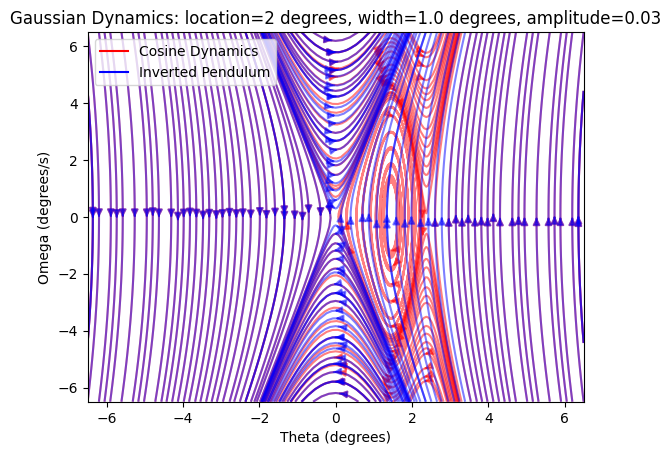

In [3]:
import matplotlib.lines as mlines

#Inverse Pendulum
Xdot_invpend = Y
Ydot_invpend = m*scaling*g*L/I*np.sin(X) - b/I*Y


fig,ax = plt.subplots()
ax.set_ylabel('Omega (degrees/s)')
ax.set_xlabel('Theta (degrees)')
ax.set_xlim(-maxAngle/10, maxAngle/10) #You can change these to divide by 20 etc to zoom in on the plot
ax.set_ylim(-maxAngle/10, maxAngle/10)
ax.set_title(f'Gaussian Dynamics: location={stability} degrees, width={np.rad2deg(sigma)} degrees, amplitude={alpha}')
ax.streamplot(xdeg, ydeg, Xdot_cos, Ydot_cos, density=1.5, color=('r',0.5), broken_streamlines=False)
ax.streamplot(xdeg, ydeg, Xdot_invpend, Ydot_invpend, density=1.5, color=('b',0.5), broken_streamlines=False)
line1 = mlines.Line2D([], [], color='r', label='Cosine Dynamics')
line2 = mlines.Line2D([], [], color='b', label='Inverted Pendulum')
plt.legend(handles=[line1, line2], loc='upper left')
plt.show()